# Set Environment

In [14]:
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import random as rn

In [15]:
np.random.seed(123)
tf.random.set_seed(456)
rn.seed(789)

In [16]:
!git clone https://github.com/Napasakon/DADS7202_CNN_Image_Classifier.git
!unzip -o /content/DADS7202_CNN_Image_Classifier/dataset.zip -d /content/DADS7202_CNN_Image_Classifier/

fatal: destination path 'DADS7202_CNN_Image_Classifier' already exists and is not an empty directory.
Archive:  /content/DADS7202_CNN_Image_Classifier/dataset.zip
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/01.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/02.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/03.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/04.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/05.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/06.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/07.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/08.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/09.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/10.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/100.jpg  
  inflating: /content/DADS7202_CNN_Image_Classifier/handball/101.j

In [17]:
def generate_npy_dataset(srcPath, desPath, imgSize=(224,224), outName='out', classNo=1):
  arr = os.listdir(srcPath)
  x = []
  y = []

  for filename in arr:
      file_destination = srcPath + filename

      img = cv2.imread(file_destination)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(RGB_img, imgSize)
      x.append(img)
      y.append(classNo)
  np.save(desPath + 'x_' + outName, x)
  np.save(desPath + 'y_' + outName, y)

In [18]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/sepak trakaw/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(299,299),
                     outName='sepak_trakaw',
                     classNo=0)

In [19]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/kendo/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(299,299),
                     outName='kendo',
                     classNo=1)

In [20]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/handball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(299,299),
                     outName='handball',
                     classNo=2)

In [21]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/fencing/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(299,299),
                     outName='fencing',
                     classNo=3)

In [22]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/baseball/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(299,299),
                     outName='baseball',
                     classNo=4)

In [23]:
generate_npy_dataset(srcPath='/content/DADS7202_CNN_Image_Classifier/high jump/',
                    desPath='/content/DADS7202_CNN_Image_Classifier/',
                     imgSize=(299,299),
                     outName='high_jump',
                     classNo=5)

In [24]:
x0 = np.load('/content/DADS7202_CNN_Image_Classifier/x_sepak_trakaw.npy')
x1 = np.load('/content/DADS7202_CNN_Image_Classifier/x_kendo.npy')
x2 = np.load('/content/DADS7202_CNN_Image_Classifier/x_handball.npy')
x3 = np.load('/content/DADS7202_CNN_Image_Classifier/x_fencing.npy')
x4 = np.load('/content/DADS7202_CNN_Image_Classifier/x_baseball.npy')
x5 = np.load('/content/DADS7202_CNN_Image_Classifier/x_high_jump.npy')

print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)

(125, 299, 299, 3)
(140, 299, 299, 3)
(130, 299, 299, 3)
(135, 299, 299, 3)
(174, 299, 299, 3)
(158, 299, 299, 3)


In [25]:
y0 = np.load('/content/DADS7202_CNN_Image_Classifier/y_sepak_trakaw.npy')
y1 = np.load('/content/DADS7202_CNN_Image_Classifier/y_kendo.npy')
y2 = np.load('/content/DADS7202_CNN_Image_Classifier/y_handball.npy')
y3 = np.load('/content/DADS7202_CNN_Image_Classifier/y_fencing.npy')
y4 = np.load('/content/DADS7202_CNN_Image_Classifier/y_baseball.npy')
y5 = np.load('/content/DADS7202_CNN_Image_Classifier/y_high_jump.npy')

print(y0.shape)
print(y1.shape)
print(y2.shape)
print(y3.shape)
print(y4.shape)
print(y5.shape)

(125,)
(140,)
(130,)
(135,)
(174,)
(158,)


In [26]:
x = np.concatenate((x0, x1, x2, x3, x4, x5))
y = np.concatenate((y0, y1, y2, y3, y4, y5))
print(x.shape)
print(y.shape)

(862, 299, 299, 3)
(862,)


In [27]:
#Train Test Split
from sklearn.model_selection import train_test_split

test_size = 0.3
x_train, x_test = train_test_split(x, test_size = test_size, random_state = 3)
y_train, y_test = train_test_split(y, test_size = test_size, random_state = 3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(603, 299, 299, 3)
(603,)
(259, 299, 299, 3)
(259,)


In [28]:
#Save Xception model in model variable
modelNoTrain = tf.keras.applications.xception.Xception()

91884032/91884032 [==============================] - 1s 0us/step


In [29]:
#Pre-processing
x_train_xc = tf.keras.applications.xception.preprocess_input(x_train)
x_test_xc = tf.keras.applications.xception.preprocess_input(x_test)

print(x_train_xc.shape)
print(x_test_xc.shape)

(603, 299, 299, 3)
(259, 299, 299, 3)


In [30]:
from keras.applications import xception

35363/35363 [==============================] - 0s 0us/step


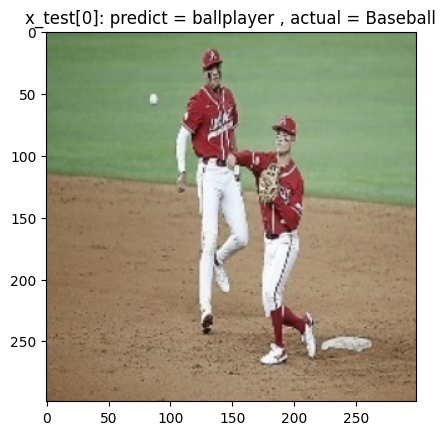

1/1 [==============================] - 1s 570ms/step


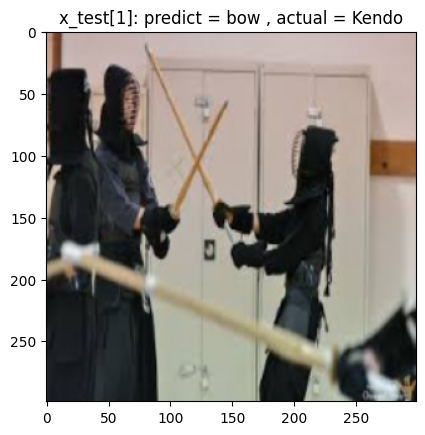

1/1 [==============================] - 1s 571ms/step


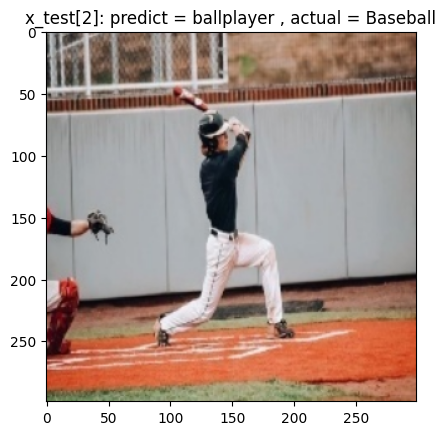

1/1 [==============================] - 1s 578ms/step


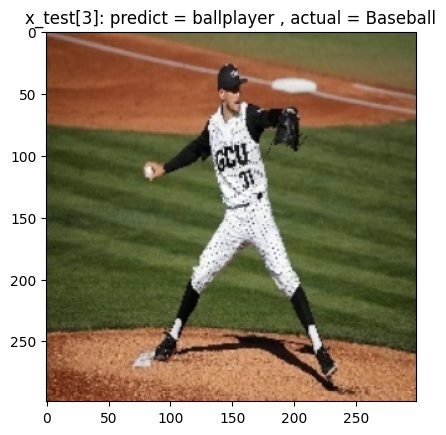

1/1 [==============================] - 0s 313ms/step


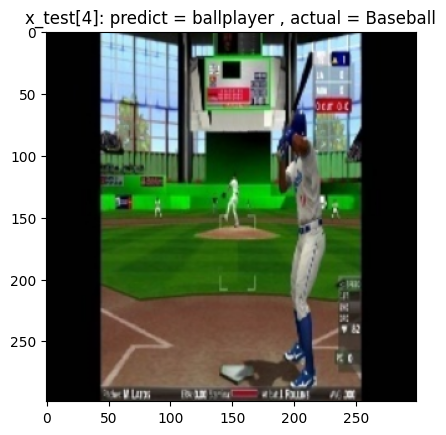

In [31]:
#Predict the inputs on the model
label = ['Sepak Trakaw','Kendo','Handball','Fencing','Baseball','High Jump']
for i in range(5):
  x_input = x_test_xc[i][np.newaxis, ...]
  predict_img = modelNoTrain.predict(x_input)
  #Let's predict top 5 results
  top_five_predict = xception.decode_predictions(predict_img, top=1)
  top_five_predict
  plt.imshow(x_test[i])
  plt.title('Predict: ' + str(top_five_predict))
  plt.title(f'x_test[{i}]: predict = {top_five_predict[0][0][1]} , actual = {label[int(y_test[i])]}')
  plt.show()